Problem Type: This is a classification problem. You are trying to predict the species of iris plants, which is a categorical variable (setosa, versicolor, or virginica).

Dataset Source: The dataset is available on Kaggle at the following link: Iris Dataset.

Features: The features used for classification are typically the measurements of sepal length, sepal width, petal length, and petal width.

Target Variable: The target variable is the species of the iris plant, which can take one of three classes: setosa, versicolor, or virginica.

#IMPORTING LIBRARIES



pandas (import pandas as pd): For handling structured data with DataFrames.

numpy (import numpy as np): For numerical operations on arrays and matrices.

matplotlib (import matplotlib.pyplot as plt): For creating static visualizations.

seaborn (import seaborn as sb): For creating attractive statistical visualizations.

Setting display options (pd.set_option): Adjusts options to display all columns and limit rows to 150 for better data exploration.

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report


#display all columns and rows of the dataframe
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 50)

IMPORTING DATA SET

Upload a file from your local machine to your Colab environment

uploaded = files.upload()

Download a file from your Colab environment to your local machine

files.download('example.txt')

In [2]:
raw= files.upload()


Saving IRIS.csv to IRIS.csv


REVIEWING THE DATASET

In [336]:
rdata=pd.read_csv('IRIS.csv')

SHALLOW COPYING

In [337]:
df=rdata.copy()

In [338]:
ndata=rdata.copy()

#EXPLORATORY DATA ANALYSIS

In [339]:
df.shape   #an attribute of a DataFrame that returns a tuple representing the dimensions of the DataFrame.

(150, 5)

In [340]:
df.head() #show first few rows to learn the structure of the data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [341]:
df.tail()#show last few rows to learn the structure of the data

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [342]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [343]:
df.info() # Display concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [344]:
# Display summary for categorical data
df.describe(include='object')

,species
count,150
unique,3
top,Iris-setosa
freq,50


In [345]:
# Display summary for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [346]:
for col in df.columns:
  print(df[col].unique())


[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [347]:
rdata.iloc[105:110,:]

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


# ***HANDLING MISSING VALUES***

In [348]:
df.duplicated().sum()

3

In [349]:
df=df.drop_duplicates()

In [350]:
df.duplicated().sum()

0

DETECTION OF MISSING VALUES

In [351]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

no missing values in the data frame verified by visualization

<Axes: >

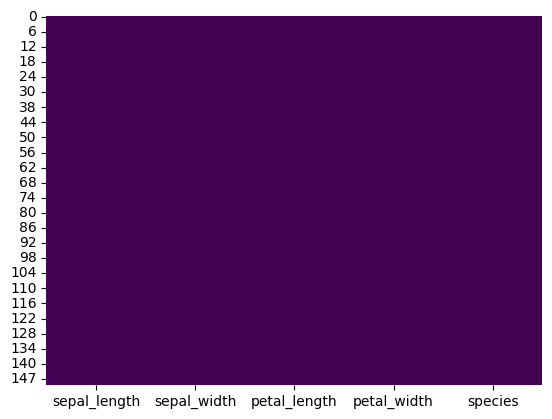

In [352]:
sb.heatmap(df.isnull(),cbar=False, cmap='viridis')

#UNIVARIATE ANALYSIS

FOR CATEGORICAL FEATURES

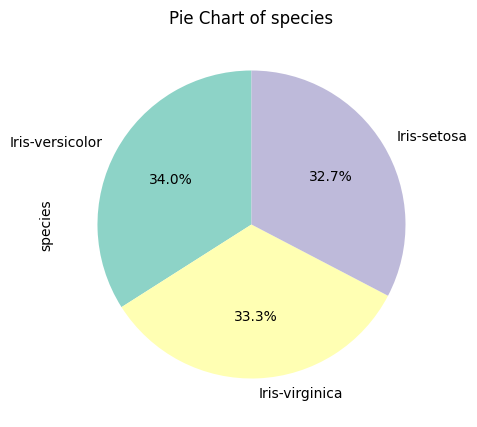

In [353]:
for column in df.select_dtypes(include='object').columns:
    # Pie chart
    plt.figure(figsize=(8, 5))  # Adjust the figsize according to your preference
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,colors=plt.cm.Set3.colors)
    plt.title(f'Pie Chart of {column}')
    plt.show()


In [354]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

NUMERICAL FEATURES

HISTOGRAM

# ***BIVARIATE ANALYSIS***

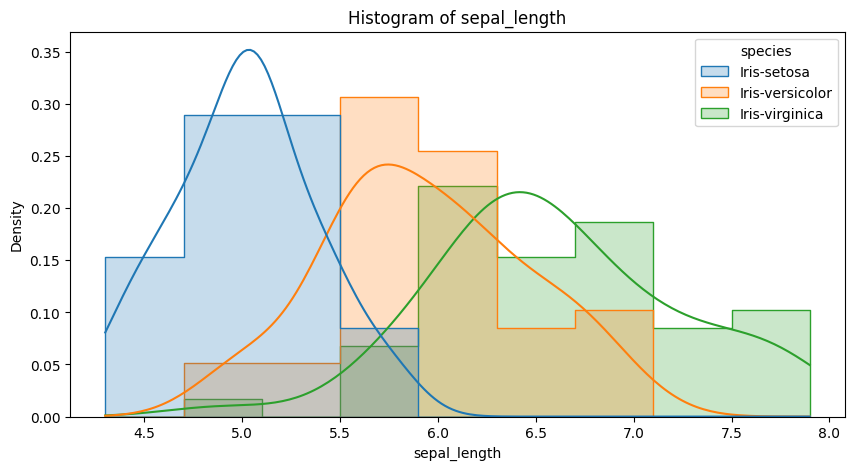

In [ ]:
# Loop through numerical columns and create histograms
for column in df.select_dtypes(include='number').columns:
    # Histogram
    plt.figure(figsize=(10, 5))
    sb.histplot(df, x=column, kde=True, hue='species', element='step', stat='density')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


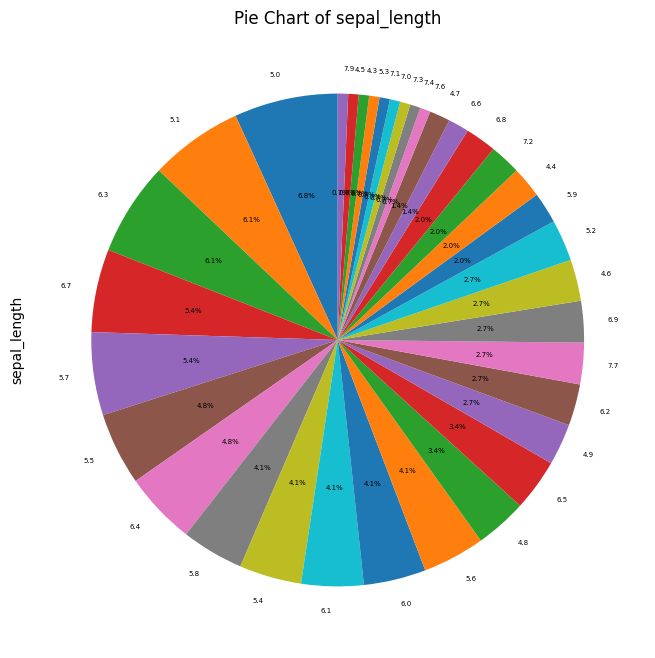

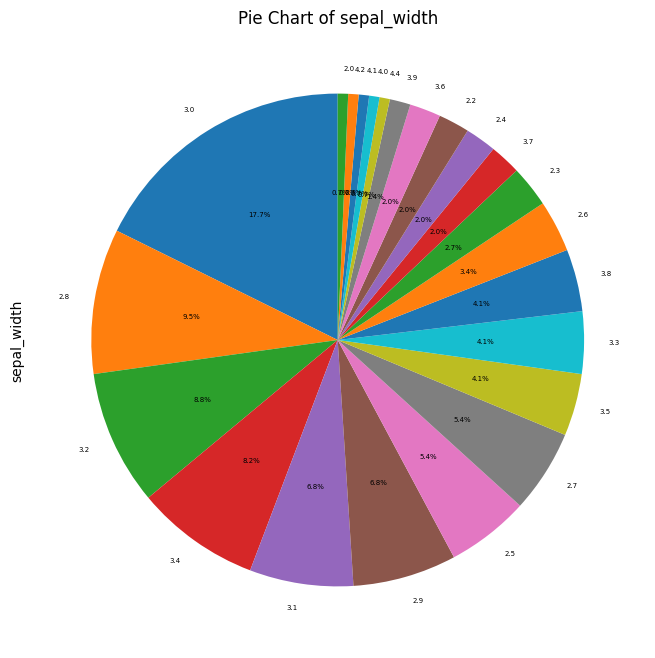

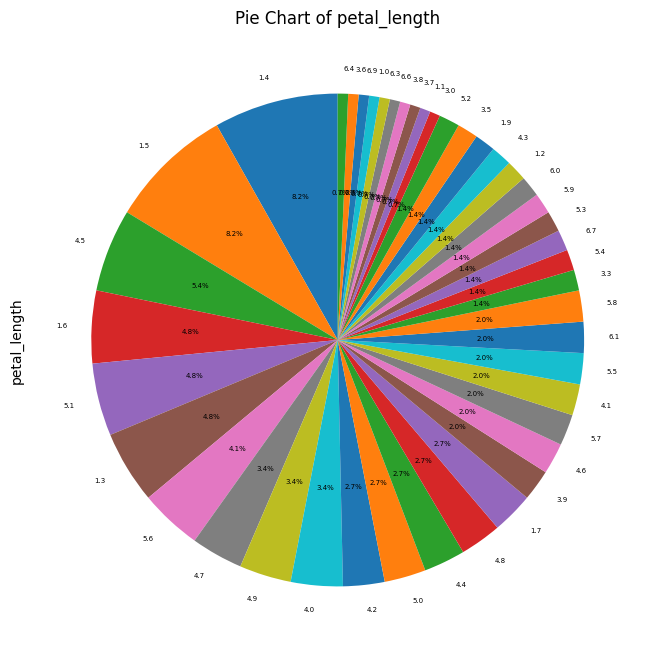

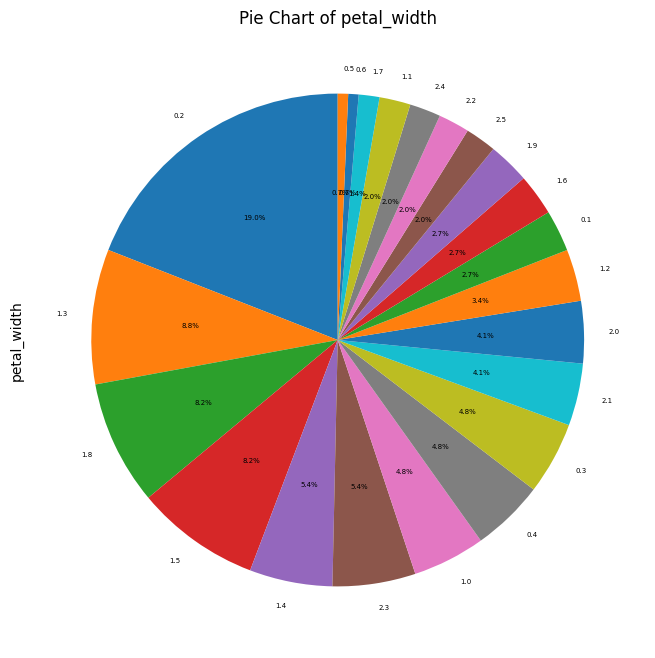

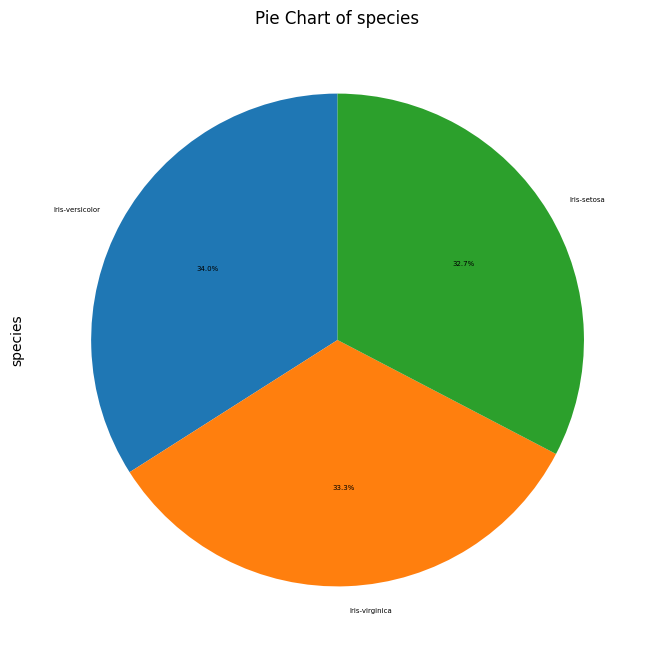

In [418]:
for column in df.columns:
    # Pie chart
    plt.figure(figsize=(8, 8))  # Adjust the figsize according to your preference
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,textprops={'fontsize': 5})
    plt.title(f'Pie Chart of {column}')
    plt.show()


In [419]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Use seaborn's barplot to plot the mean 'price' for each category in the selected numeric column

In [ ]:
# Loop through numerical columns and create bar plots
for column in df.select_dtypes(include='number').columns:
    # Skip plotting 'species' vs 'species'
    if column == 'species':
        continue

    # Create a bar plot
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)

    # Use seaborn's barplot to plot the mean 'species' for each category in the selected numeric column
    sb.barplot(data=df, x=column, y='species', palette='Set2')

    plt.title(f'{column} vs species')
    plt.show()

In [ ]:
columns_to_skip = ['species']

for column in df.columns:
    # Skip plotting specific columns
    if column in columns_to_skip:
        continue


    # Create a bar plot for the binary attrition
    plt.figure(figsize=(8, 5))
    plt.xticks(rotation=0)

    # Use seaborn's countplot to plot the count of 'species' for each category in the selected numeric column
    sb.countplot(data=df, x=column, hue='species', palette='Set2')

    plt.title(f'{column} vs species')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='species', labels=['Iris setosa','Irisversicolor','Iris_viginica'])
    plt.xticks(fontsize=5)
    plt.show()

#STATISTICAL SUMMARY

Use describe for an overview of summary statistics
summary_stats = df.describe()

 Calculate individual summary statistics

mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # Mode can return multiple values, take the first one
variance_values = df.var()
std_dev_values = df.std()

 Display the results

print("Summary Statistics:")
summary_stats

print("\nIndividual Summary Statistics:")
print("Mean:")
print(mean_values)

print("\nMedian:")
print(median_values)

print("\nMode:")
print(mode_values)

print("\nVariance:")
print(variance_values)

print("\nStandard Deviation:")
print(std_dev_values)

BAR CHART FOR DESCRIPTIVE STATISTICS

In [ ]:
for column in df.select_dtypes(include='number').columns:
# Bar chart for descriptive statistics
  summary_stats = df[column].describe()
  plt.figure(figsize=(8,4))
  sb.barplot(x=summary_stats.index, y=summary_stats.values, palette='viridis')
  plt.title(f'Descriptive Statistics of {column}')
  plt.ylabel('Value')
  plt.xticks(rotation=45,ha='right')
  plt.show()

In [ ]:
df.describe().T


In [ ]:
# Pair Plot of Iris Dataset by Species
plt.figure(figsize=(10,6))
sb.pairplot(df,hue='species')
plt.show()

HEATMAP FOR CORRELATION

In [ ]:
correlation=df.corr()
plt.figure(figsize=(20,5))
mask = np.triu(np.ones_like(correlation), k=1)
sb.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)
plt.show()



# OUTLIERS DETECTION AND REMOVAL

 DETECTION

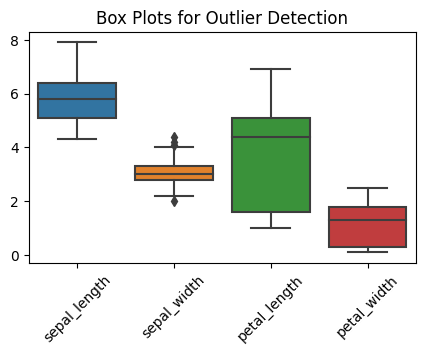

In [414]:
# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for numerical columns
plt.figure(figsize=(5,3))
sb.boxplot(data=df[numerical_columns])
plt.title('Box Plots for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Create scatter plots for pairs of numerical columns
#plt.figure(figsize=(12, 8))
#sb.pairplot(df[numerical_columns])
#plt.suptitle('Pair Plots for Outlier Detection', y=1.02)
#plt.show()


In [415]:
# Calculate IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Set a multiplier for IQR (adjust as needed)
iqr_multiplier = 1.5

# Identify and remove outliers based on IQR
df_no_outliers_iqr = df[~((df < (Q1 - iqr_multiplier * IQR)) | (df > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

# Display before and after
print("Before IQR Removal:")
print(df.describe())

print("\nAfter IQR Removal:")
print(df_no_outliers_iqr.describe())


Before IQR Removal:
       sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

After IQR Removal:
       sepal_length  sepal_width  petal_length  petal_width
count    143.000000   143.000000    143.000000   143.000000
mean       5.870629     3.038462      3.830769     1.230769
std        0.835045     0.398222      1.750824     0.754538
min        4.300000     2.200000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000


<ipython-input-415-131499712e54>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-415-131499712e54>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-415-131499712e54>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers_iqr = df[~((df < (Q1 - iqr_multiplier * IQR)) | (df > (Q3 + iqr_multiplier * IQR))).any(axis=1)]


Before IQR Removal:

Initial count: 147 samples

Mean values:

Sepal Length: 5.86

Sepal Width: 3.06

Petal Length: 3.78

Petal Width: 1.21

Standard deviations:

Sepal Length: 0.83

Sepal Width: 0.44

Petal Length: 1.76

Petal Width: 0.76

Minimum and maximum values for each feature.

After IQR Removal:

Count after removing outliers: 143 samples

Similar descriptive statistics as before, but the data now reflects the distribution after removing outliers.

The IQR removal process involves identifying and removing data points outside the interquartile range, enhancing the robustness of the dataset.

The resulting dataset has a slightly reduced count due to the removal of outliers.

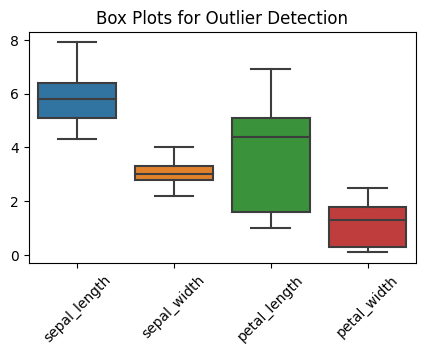

In [416]:
# Select numerical columns for outlier detection
numerical_columns = df_no_outliers_iqr.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for numerical columns
plt.figure(figsize=(5,3))
sb.boxplot(data=df_no_outliers_iqr[numerical_columns])
plt.title('Box Plots for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Create scatter plots for pairs of numerical columns
#plt.figure(figsize=(12, 8))
#sb.pairplot(df_no_outliers_iqr[numerical_columns])
#plt.suptitle('Pair Plots for Outlier Detection', y=1.02)
#plt.show()

#ORDINAL ENCODING

In [417]:
df_no_outliers_iqr.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [412]:
le= LabelEncoder() # Simple conversion of categorical data to numerical format for analysis or ML models."
df_encoded=df_no_outliers_iqr.copy()
df_encoded['species']=le.fit_transform(df_encoded['species'])
# Apply label encoding to each categorical column

In [413]:
df_encoded.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [371]:
df_encoded.shape

(143, 5)

In [372]:
df_encoded.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [373]:
df_encoded.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#DATA PARTITIONING

In [374]:
X = df_encoded.drop('species', axis=1)

y=df_encoded['species']

DATA PARTITIONING:

The dataset will be divided into 80% for training and 20% for testing.


In [375]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#***MODEL BUILDING***

#LOGISTIC REGRESSION

Logistic regression

It is a popular supervised machine learning algorithm used for predicting categorical outcomes based on a set of independent variables.

It's mainly used for classification tasks, where the dependent variable is binary (e.g., 0 or 1, Yes or No), and it provides probabilistic values between 0 and 1 as predictions.

Unlike linear regression, which is used for regression problems, logistic regression employs an "S"-shaped logistic function to model the probability of an observation belonging to a particular class.

This algorithm is valuable because it can provide probability estimates and effectively classify new data using both continuous and discrete datasets.

It's widely used in various fields, including healthcare for diagnosing diseases, marketing for customer segmentation, and more.





In [376]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [377]:
  # Assuming your model is already trained
y_pred = classifier.predict(x_test)

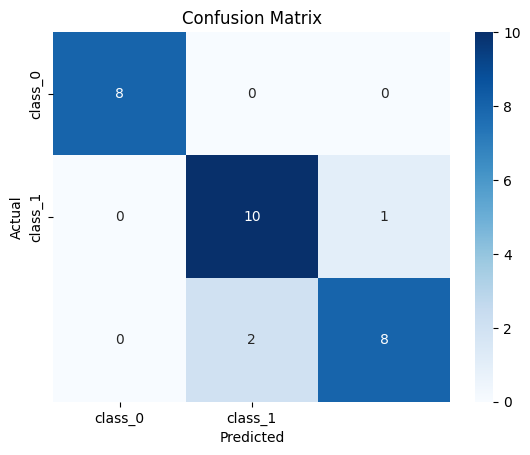

In [378]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [379]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [380]:
# Print accuracy
lr_acs = accuracy_score(y_test, y_pred)*100
print("\nAccuracy:", lr_acs)



Accuracy: 89.65517241379311


# ***KNN***

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.


K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.


K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.


K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.


It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.


KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset.

STEPS:

        Select the number K of the neighbors

        Calculate the Euclidean distance of K number of neighbors

        Take the K nearest neighbors as per the calculated Euclidean distance

        Among these k neighbors, count the number of the data points in each category

        Assign the new data points to that category for which the number of the neighbor is maximum

        Our model is ready




In [381]:
knn = KNeighborsClassifier(n_neighbors= 5, p=2)
knn.fit(x_train,y_train)


KNeighborsClassifier()

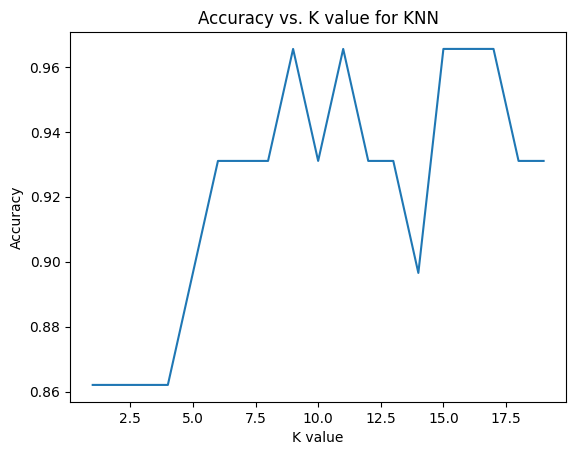

In [382]:
# try ro find best k value
scoreList = []  # Initialize an empty list to store scores

# Iterate through different values of k
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    scoreList.append(score)

# Plot the results
plt.plot(range(1, 20), scoreList)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K value for KNN")
plt.show()


In [383]:
  # Assuming your model is already trained
y_pred_knn = knn.predict(x_test)

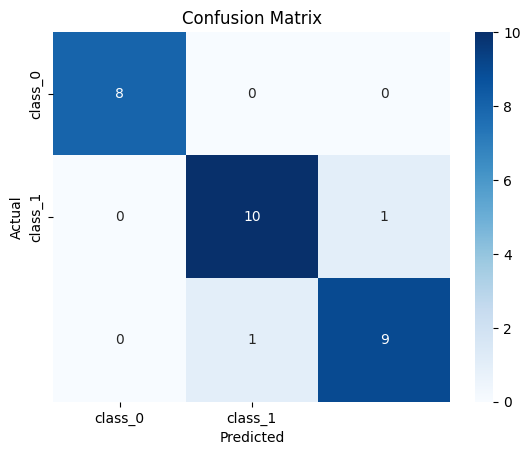

In [384]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [385]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.94        29
weighted avg       0.93      0.93      0.93        29



In [386]:
# Print accuracy
knn_acs = accuracy_score(y_test, y_pred_knn)*100
print("\nAccuracy:", knn_acs)



Accuracy: 93.10344827586206


# ***SVM***

Support Vector Machine (SVM)

It is a popular supervised learning algorithm primarily used for classification tasks, although it can be applied to regression problems as well.

Its main objective is to find the optimal hyperplane that separates data in an n-dimensional space into distinct classes.

This hyperplane is designed to best classify new data points in the future. SVM identifies the most critical data points, known as support vectors, to determine this hyperplane, which is why it's called a Support Vector Machine.

In [387]:
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [388]:
  # Assuming your model is already trained
y_pred_svc = svc.predict(x_test)

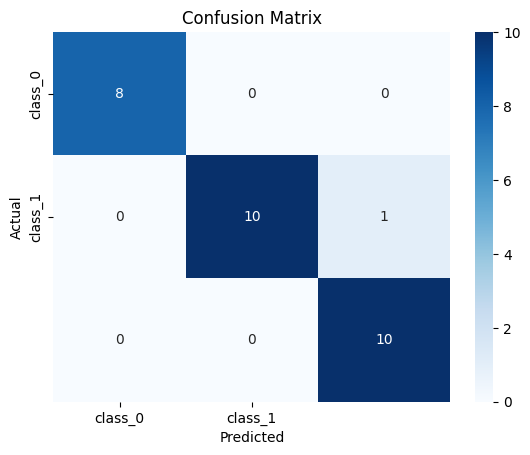

In [389]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [390]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        29
   macro avg       0.97      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29



In [391]:
# Print accuracy
svc_acs = accuracy_score(y_test, y_pred_knn)*100
print("\nAccuracy:", svc_acs)



Accuracy: 93.10344827586206


# ***NAIVE BAYES CLASSIFICATION***

Naïve Bayes classification

It is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes theorem in the classifier's decision rule. Naïve Bayes classifier applies the Bayes theorem in practice. This classifier brings the power of Bayes theorem to machine learning.

2. Naive Bayes algorithm intuition


Naïve Bayes Classifier uses the Bayes theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the Maximum A Posteriori (MAP).

The MAP for a hypothesis with 2 events A and B is

MAP (A)

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.

Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.

3. Types of Naive Bayes algorithm

Gaussian Naïve Bayes

Multinomial Naïve Bayes

Bernoulli Naïve Bayes

Gaussian Naïve Bayes algorithm

When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class.


Multinomial Naïve Bayes algorithm

With a Multinomial Naïve Bayes model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn)  Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification.

Bernoulli Naïve Bayes algorithm

In the multivariate Bernoulli event model, features are independent boolean variables (binary variables) describing inputs. Just like the multinomial model, this model is also popular for document classification tasks where binary term occurrence features are used rather than term frequencies.

Applications


Spam filtering

Text classification


Sentiment analysis

Recommender systems

It uses Bayes theorem of probability for prediction of unknown class

In [392]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
print('classification_report:\n',classification_report(y_test,y_pred_nb))
print('accuracy:',accuracy_score(y_test,y_pred_nb)*100)
print('Error value',np.mean(y_pred_nb!=y_test)*100)
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_nb))

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      0.73      0.80        11
           2       0.75      0.90      0.82        10

    accuracy                           0.86        29
   macro avg       0.88      0.88      0.87        29
weighted avg       0.87      0.86      0.86        29

accuracy: 86.20689655172413
Error value 13.793103448275861
confusion_matrix
 [[8 0 0]
 [0 8 3]
 [0 1 9]]


In [393]:
  # Assuming your model is already trained
y_pred_nb = nb.predict(x_test)

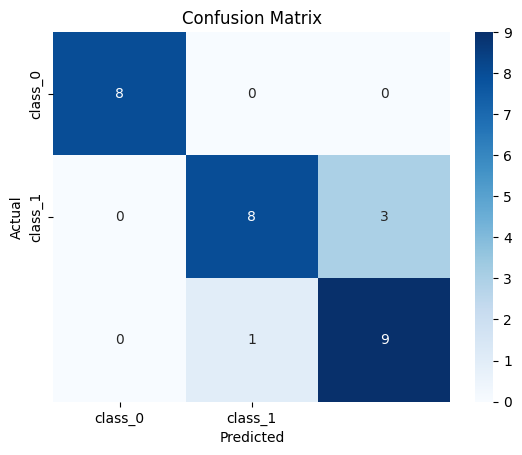

In [394]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [395]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      0.73      0.80        11
           2       0.75      0.90      0.82        10

    accuracy                           0.86        29
   macro avg       0.88      0.88      0.87        29
weighted avg       0.87      0.86      0.86        29



In [396]:
# Print accuracy
nb_acs = accuracy_score(y_test, y_pred_nb)*100
print("\nAccuracy:", nb_acs)



Accuracy: 86.20689655172413


In [397]:
nb.score(x_test,y_test)

0.8620689655172413

In [398]:
nb.score(x_train,y_train)

0.9736842105263158

#DECISION TREE

**Step-1**: Begin the tree with the root node, says S, which contains the complete dataset.

**Step-2**: Find the best attribute in the dataset using Attribute Selection Measure (ASM).

**Step-3:** Divide the S into subsets that contains possible values for the best attributes.

**Step-4**: Generate the decision tree node, which contains the best attribute.

**Step-5**: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.



In [399]:
#Train
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [400]:
 y_pred_dtc = dtc.predict(x_test)

In [401]:
 score_dtc = accuracy_score(y_test, y_pred_dtc)*100
score_dtc

89.65517241379311

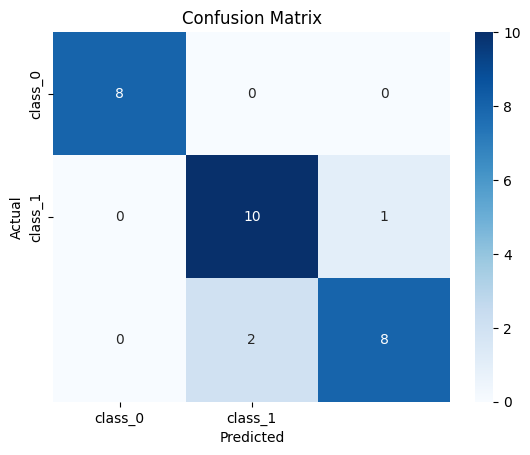

In [402]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtc)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [403]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtc))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [404]:
dtc_acs=accuracy_score(y_test, y_pred_dtc)*100
dtc_acs

89.65517241379311

# Random Forest Regression

Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or the mean prediction (regression) of the individual trees. The "random" in Random Forest comes from the fact that each tree is trained on a random subset of the data.

Key Concepts:

Decision Trees:

A decision tree is a flowchart-like structure where each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label.
Decision trees are prone to overfitting, meaning they may perform well on the training data but poorly on unseen data.

Ensemble Learning:

Random Forest belongs to the family of ensemble methods, which combine the predictions of multiple models to improve overall performance.
In the case of Random Forest, the ensemble consists of multiple decision trees.

Bagging (Bootstrap Aggregating):

Random Forest builds multiple decision trees by resampling the training data with replacement (bootstrap samples).
Each tree is trained on a different subset of the data.

Feature Randomization:

Random Forest introduces additional randomness by considering only a random subset of features at each split point in each decision tree.

This helps decorrelate the trees and reduces the risk of overfitting.

Ensemble Building:

Initialize the Random Forest classifier with hyperparameters (e.g., the number of trees, maximum depth of trees, etc.).

Train each decision tree on a different bootstrap sample of the training data

Advantages of Random Forest:

High Accuracy: Random Forest generally produces high-accuracy models.

Handles Missing Values: It can handle missing values in the dataset.

Robust to Overfitting: The ensemble approach helps reduce overfitting.

Good for High-Dimensional Data: It performs well on datasets with a large number of features.

Disadvantages of Random Forest:

Complexity: Random Forest can be computationally expensive and may take longer to train.

Insufficient Interpretability: The ensemble nature makes it challenging to interpret individual decision trees.

Random Forest is a powerful and versatile algorithm that is widely used for various machine learning tasks, especially when both accuracy and interpretability are important.

In [405]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [406]:
# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [407]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(x_test)

In [408]:
# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



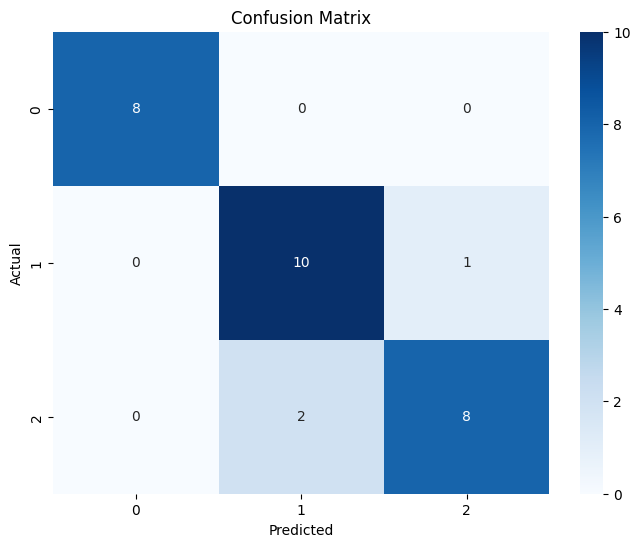

In [409]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [410]:
acs_rf=accuracy_score(y_test, y_pred_rf)*100
acs_rf

89.65517241379311

Logistic Regression Accuracy: 89.66
KNN Accuracy: 93.10
SVC Accuracy: 93.10
Naive Bayes Accuracy: 86.21
Desicion tree classifier Accuracy: 89.66
Random Forest Classifier Accuracy: 89.66


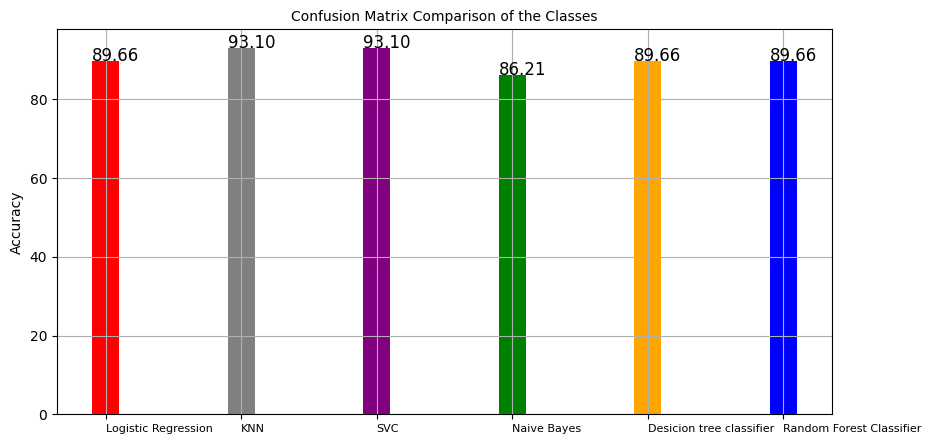

In [411]:
class_name = ("Logistic Regression", "KNN", 'SVC',"Naive Bayes",'Desicion tree classifier','Random Forest Classifier')
class_score = (lr_acs,knn_acs,svc_acs,nb_acs,dtc_acs,acs_rf)
for name, score in zip(class_name, class_score):
    print(f"{name} Accuracy: {score:.2f}")

y_pos = np.arange(len(class_score))
colors = ("red", "gray", "purple", "green", "orange","blue")

plt.figure(figsize=(10, 5))

# Adjust the width parameter to decrease the bar size
bar_width = 0.2  # You can adjust this value as needed
bar_positions = y_pos - bar_width / 2
bars = plt.bar(y_pos, class_score, color=colors, width=bar_width)

# Adding annotations to the bars
for bar, score in zip(bars, class_score):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f"{score:.2f}", fontsize=12)

plt.xticks(y_pos, class_name,ha='left',fontsize=8)
plt.ylabel('Accuracy')
plt.grid()
plt.title("Confusion Matrix Comparison of the Classes", fontsize=10)
plt.show()


KNN and SVC: Achieved the highest accuracy of 93.10%, making them top choices.


Logistic Regression, Decision Tree, and Random Forest: Showed decent accuracy (86.21% to 89.66%).